# Observations of the heat budget of coastal Arctic sea ice under the influence of a river outflow

Master analysis notebook for this Ikaagvik Sikukuun paper.

In [358]:
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da
import cartopy.crs as ccrs
import cartopy
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeature
from osgeo import gdal, osr
import gsw
import windrose
import warnings
import pickle
import tqdm

from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import colorcet as cc
%matplotlib inline

%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Figure 1: Layered Sea Ice Cover Map

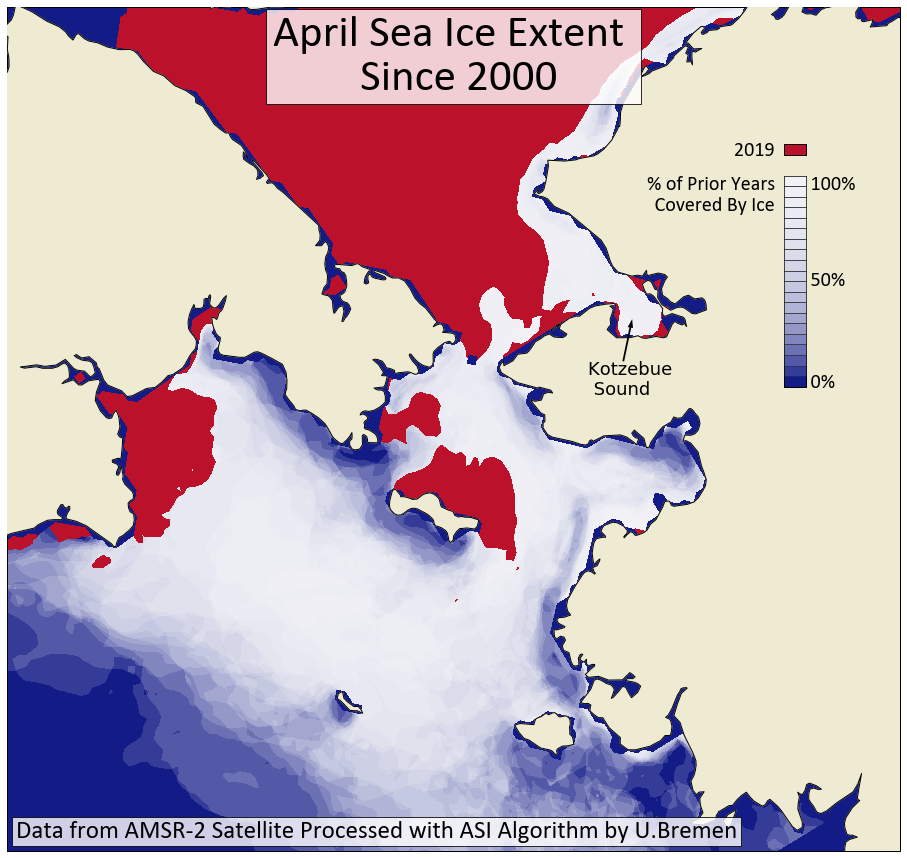

In [194]:
#open datasets of sea ice cover in Bering Strait region for 2000-2018 and 2019 (see Appendix 1 for how I got these datasets)
si = xr.open_dataset('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2018.nc')
si19 = xr.open_dataset('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2019.nc')

#generate map of transparent sea ice cover + 2019 overlaid in red
from Satellite_SeaIce_Toolbox import plot_layered_ice_map
plot_layered_ice_map(si = si, 
                     si19 = si19, 
                     startDay = 91,       #first yearday of April 
                     endDay = 120,        #last yearday of April 
                     thresh = 70,         #minimum sea ice cover threshold to plot as "covered"
                     transparency = 0.15, #transparency of each layer. 0.15 will make a 100% value be about 96% opaque
                     plotflag = 0)        #set to 1 if you want to save figures for every year as it is added

#plt.savefig('Figures/Layered Sea Ice Maps/AprSeaIceExtent_to_2019.png',dpi=300,facecolor='k')

*Figure 1: Sea ice cover (>70%) in the Chukchi and Bering Seas for every April going back to April of 2000. Each year is plotted as a transparent white layer representing the April average, building up a climatology over which 2019 average April sea ice cover is shown in red.*

## Figure 2: Sea Ice and SST Monthly Anomalies

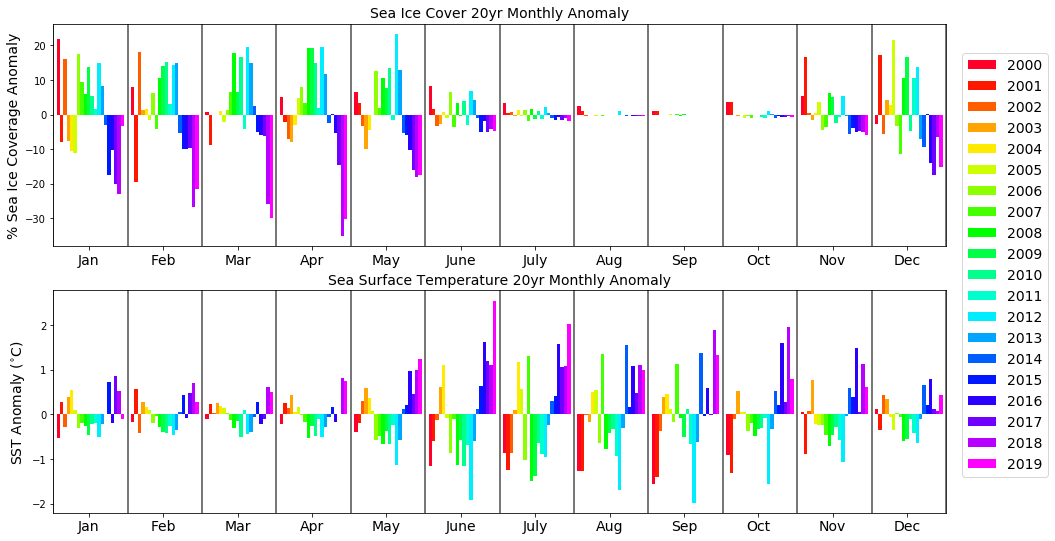

In [30]:
si_mask = xr.open_dataset('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2019_masked.nc')
sst = xr.open_dataset('../../Data/Satellite/SST/oisst_BeringStraitRegion_2000-2019.nc')

from Satellite_SeaIce_Toolbox import plot_monthly_anomalies
plot_monthly_anomalies(si = si_mask, sst = sst)

*Figure 2: Recent years have seen growing negative anomalies in sea ice cover in the Chukchi and Bering seas, particularly in the marginal months of December, April, and May (top), accompanied by positive summer SST anomalies (bottom). Data from Hamburg ICDC SSMI product (Sea Ice) and Nasa OISST Reynolds interpolated product (SST), spanning the geographical region depicted in Figure 1.*

## Figure 3: Layered Landfast Ice Extent Map

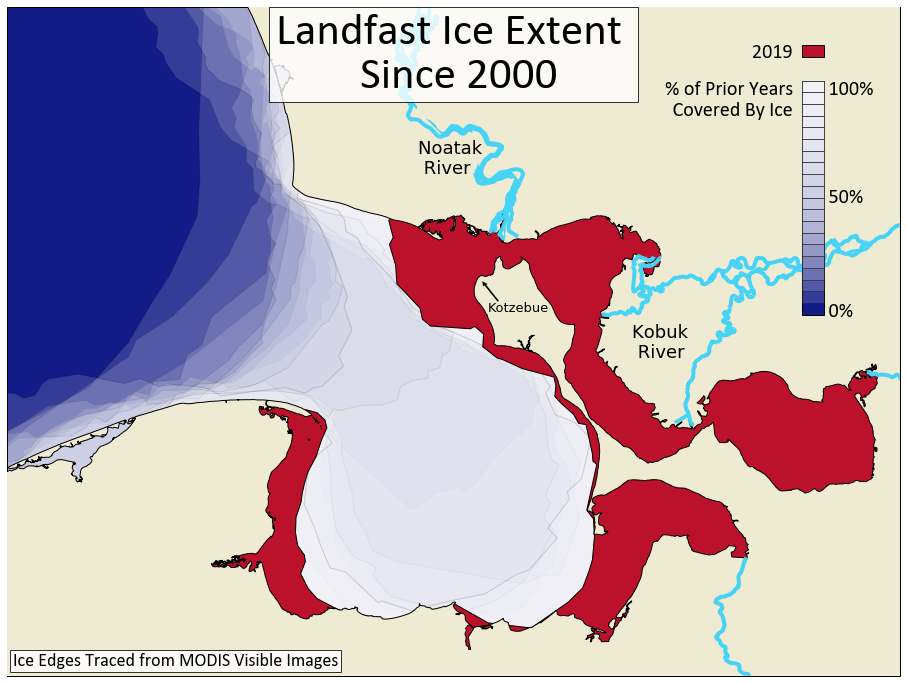

In [52]:
from Satellite_SeaIce_Toolbox import plot_layered_landfast_ice_map
plot_layered_landfast_ice_map(data_folder = '..\QGIS\Landfast Ice', 
                              coastline_path = '../QGIS/GISdata/Coastlines/Alaska_Coast_63360_py_KotzSoundRegion_WGS84.shp', 
                              river_path = '../QGIS/GISdata/Rivers/Major_Rivers_WGS84.shp', 
                              transparency = 0.15, 
                              xmin = -165.4, 
                              xmax = -160.1, 
                              ymin = 65.9, 
                              ymax = 67.55)

*Figure 3: Landfast Ice Climatology back to 2000 plotted following the same scheme as Figure 1. The Landfast ice edge for each year was defined as a coherent ice edge that remained stationary between its formation in February/March and the breakup of the entire sound in May/June. These edges were visually identified and hand-traced from MODIS visible images in a GIS program.* 

## Potential New Figure: Satellite View of Kotzebue Sound Breakup
We want to communicate more explicitly what a breakup process looks like, and the idea that the historical norm is for the river to break out first. Perhaps one or two years of more "normal" conditions, and then 2019? The best years from a perspective of cloud cover are 2007 and 2012. Note that 2012 stands out in the anomaly plots as a particularly strong ice year/low SST year...

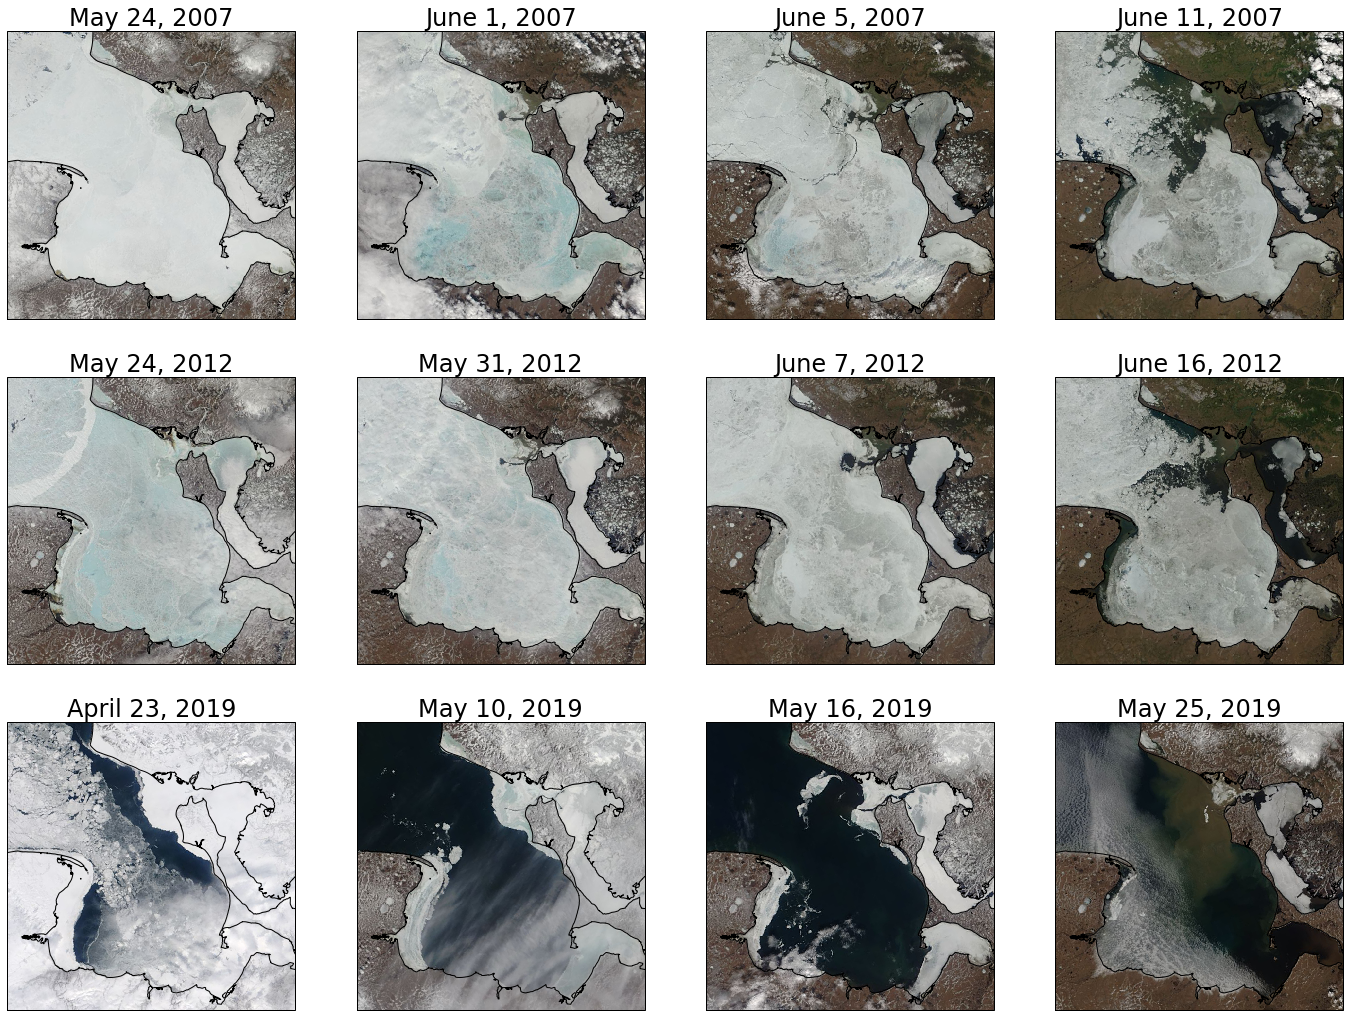

In [110]:
paths_2007 = ['../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070524.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070601.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070605.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2007/KotzSound_20070611.tif']
paths_2012 = ['../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120524.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120531.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120607.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2012/KotzSound_20120616.tif']
paths_2019 = ['../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190423.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190510.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190516.tif',
              '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190525.tif']

coastline_path = '../QGIS/GISdata/Coastlines/Alaska_Coast_63360_py_KotzSoundRegion_WGS84.shp'

from Satellite_SeaIce_Toolbox import plot_breakup_images
plot_breakup_images(paths_2007, paths_2012, paths_2019, coastline_path, 
                    lon_min_MOD = -164.3, 
                    lon_max_MOD = -161.3, 
                    lat_min_MOD = 66, 
                    lat_max_MOD = 67.2, 
                    fontsz = 24,
                    figsz = (24,18))

## Figure 4: Measurement Stations in Kotzebue Sound

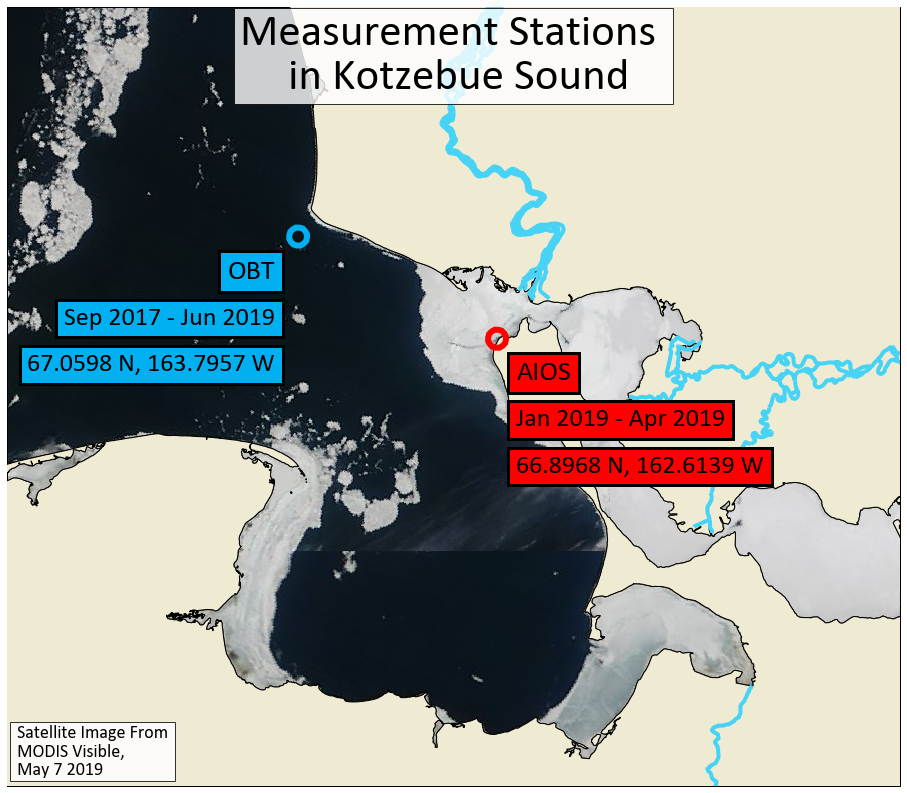

In [45]:
from Satellite_SeaIce_Toolbox import plot_measurement_stations
plot_measurement_stations(image_path = '../../Data/Satellite/Visible Imagery/MODIS_KotzSound/2019/KotzSound_20190506.tif',
                          image_2path = '../../Data/Satellite/Visible Imagery/KotzSound_20190507_crop2.tif',
                          coastline_path = '../QGIS/GISdata/Coastlines/Alaska_Coast_63360_py_KotzSoundRegion_WGS84.shp',
                          river_path = '../QGIS/GISdata/Rivers/Major_Rivers_WGS84.shp',
                          figsz = (16,16),
                          lon_min_MOD = -165,
                          lon_max_MOD = -160.5, 
                          lat_min_MOD = 66,
                          lat_max_MOD = 67.5,
                          sis_color = 'r',
                          obt_color = '#00b0f0',
                          fontsz = 28)

*Figure 4: Locations of the Sea Ice Station (SIS) and Ocean Bottom Tripod (OBT) measurement stations in Kotzebue Sound, with their dates of deployment and recovery. *

## Figure 5: SIS Schematic
(made in Powerpoint)

![](./Figures/SIS schematic v4.png)

*Figure 5: The Sea Ice Station featured measurements of net radiative fluxes, air temperature, humidity, pressure, wind speed, and solar insolation above the ice. Below the ice, moorings measured water temperature, salinity, and current profiles (see Table 1 for deployment depths). Measurements of snow and ice thickness were made by local observers on a weekly basis using calibrated stakes.*

## Figure 6: Overview of SIS Measurements

In [50]:
#----Declare Variables----
lat, lon = 66.8968, -162.6139
start, end = pd.datetime(2019,1,7,22,45,0), pd.datetime(2019,4,1,20,0,0)

#----Load QC'd Data-------
aqd2dir = xr.open_dataset("../Sea Ice Station & OBT/Pickles/aquadopp_currents.nc")
aqd2dir = aqd2dir.where(aqd2dir.bindepth>1)
aqdXr = xr.open_dataset("../Sea Ice Station & OBT/aquadopp_currents_real.nc")
tempsXr = xr.open_dataarray("../Sea Ice Station & OBT/Pickles/temperature_uninterpolated.nc")
tempsXrInterp = xr.open_dataarray("../Sea Ice Station & OBT/Pickles/temperature_profile.nc")
rbr = pickle.load( open( "../Sea Ice Station & OBT/Pickles/concerto_10minResample.p", "rb" ))
rbr = rbr[1:] #to line times up with tempsXr
maximet = pickle.load( open( "../Sea Ice Station & OBT/Pickles/maximet_selectedvars_10minResample_QCv1.p", "rb" ) )
cnr_rsmpl = pickle.load( open( "../Sea Ice Station & OBT/Pickles/cnr_10minResample.p", "rb" ))
mbs_mean = pickle.load( open( "../Sea Ice Station & OBT/Pickles/mbs_channel_meanValues.p", "rb" ))
fws_rsmpl = pickle.load( open( "../Sea Ice Station & OBT/Pickles/fws_10minResample.p", "rb" ))
tt = pd.read_pickle('../Sea Ice Station & OBT/Pickles/tinytag.p')

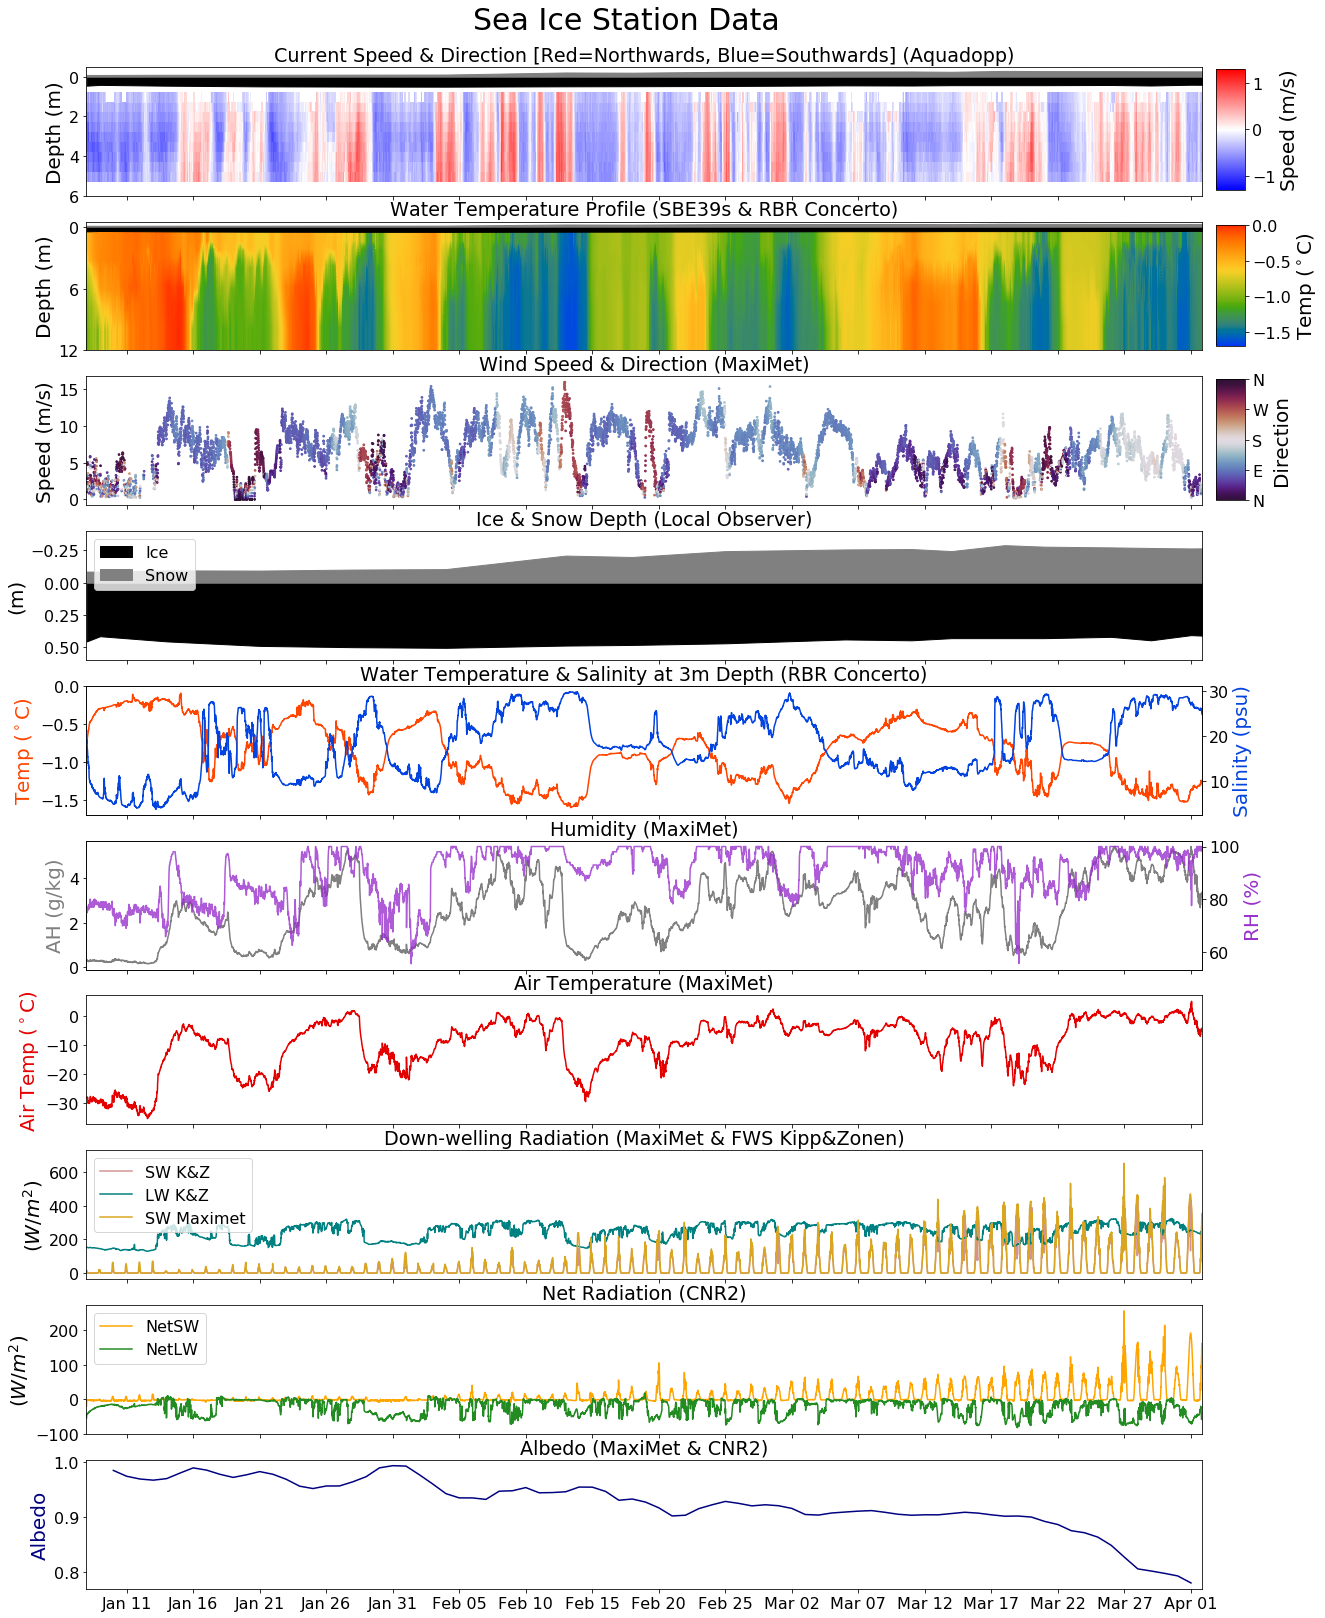

In [57]:
from IkSi_Analysis_Toolbox import plot_overview_timeseries
plot_overview_timeseries(start, end, aqd2dir, mbs_mean, tempsXrInterp, rbr, maximet, fws_rsmpl, cnr_rsmpl)

*Figure 6: Summary of all measurements made on the SIS: bi-directional water currents; water temperatures & salinity; wind speed & direction; ice & snow thickness; air temperature, humidity, and pressure; net LW and SW radiation; and down-welling SW radiation. Also shown are down-welling LW and SW radiation measurements from a tower above the Fish & Wildlife Service (FWS) building in the town of Kotzebue. Daily albedo values are shown in the bottom panel, calculated by differencing the CNR2 net radiometer from the down-welling SW sensor on the MaxiMet.*

## Figure 7: Bi-directional current correlations

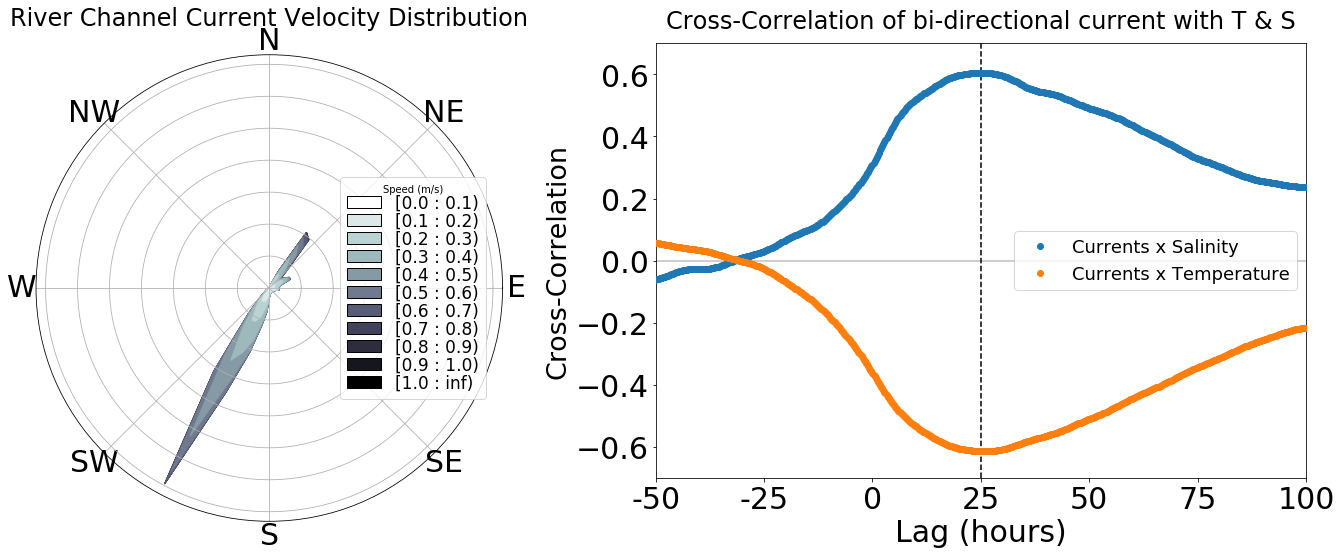

In [125]:
from IkSi_Analysis_Toolbox import bidir_current_correlations
bidir_current_correlations(aqdXr, aqd2dir, tempsXrInterp, rbr)

*Figure 7: (Left) Directional histogram of currents measured at the Sea Ice Station, showing highly bi-modal behavior. (Right) Lag correlations between 1-dimensional (bi-directional) current parameter and both water temperature & salinity.*

## Figure 8: Timeseries of $u_{*0}$ and $\Delta T$

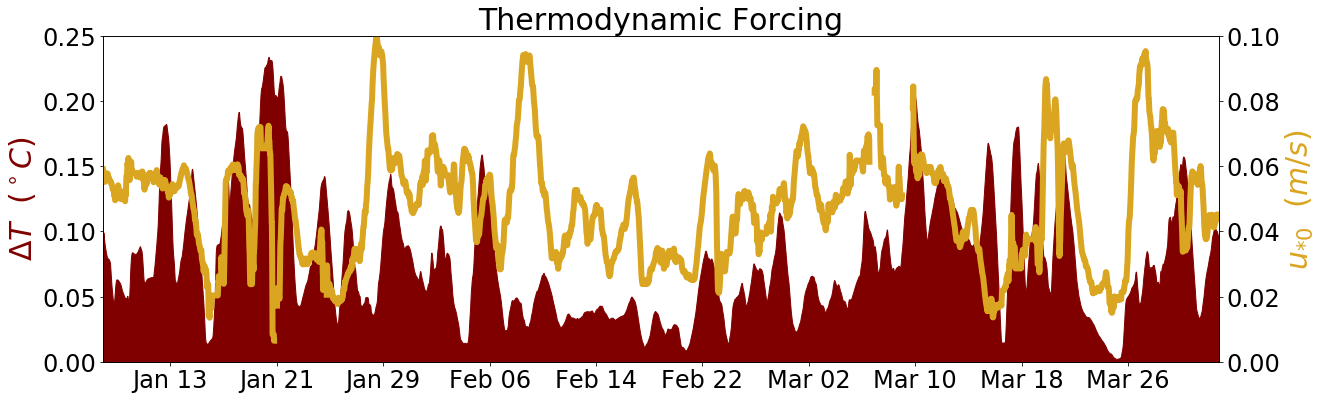

In [154]:
from IkSi_Analysis_Toolbox import calculate_deltaT, calculate_ustar, plot_thermodynamic_forcing
roll=4 #number of 15-minute periods to calculate the rolling mean over

rbr = calculate_deltaT(rbr, tempsXrInterp)
rbr_rsmpl = rbr.resample('15min').mean()
deltaT = rbr_rsmpl.deltaT_Adjusted.rolling(roll,center=True).mean()
ustar = calculate_ustar(aqdXr, roll)
plot_thermodynamic_forcing(deltaT, ustar, start, end)

*Figure 8: Timeseries of friction velocity $u_{*0}$ and departure from freezing $ΔT$, the two terms affecting variations in the magnitude of the ocean-ice heat flux.* 

## Figure 9: $St*$ vs $Re*$ for existing data sets compared to our data set

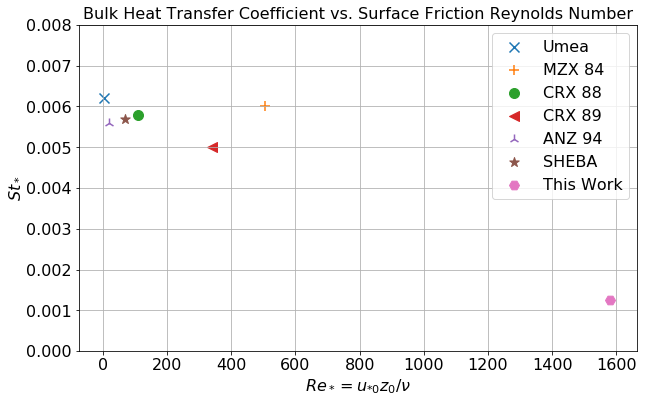

In [225]:
from IkSi_Analysis_Toolbox import plot_St_vs_Re
StvRe = pd.read_csv('../../Data/Sea Ice Station/HeatFluxScaling/ReynoldsNumber_vs_StantonNumber.csv',index_col=0)
plot_St_vs_Re(StvRe)

*Figure 9: Stanton number has displayed no dependence on roughness Reynolds number for existing in-situ data sets of under-ice heat flux measurements, however this study suggests that the dependence anticipated from laboratory studies may emerge at sufficiently large roughness Reynolds numbers.*

## Figure 10: Flux balances at both interfaces

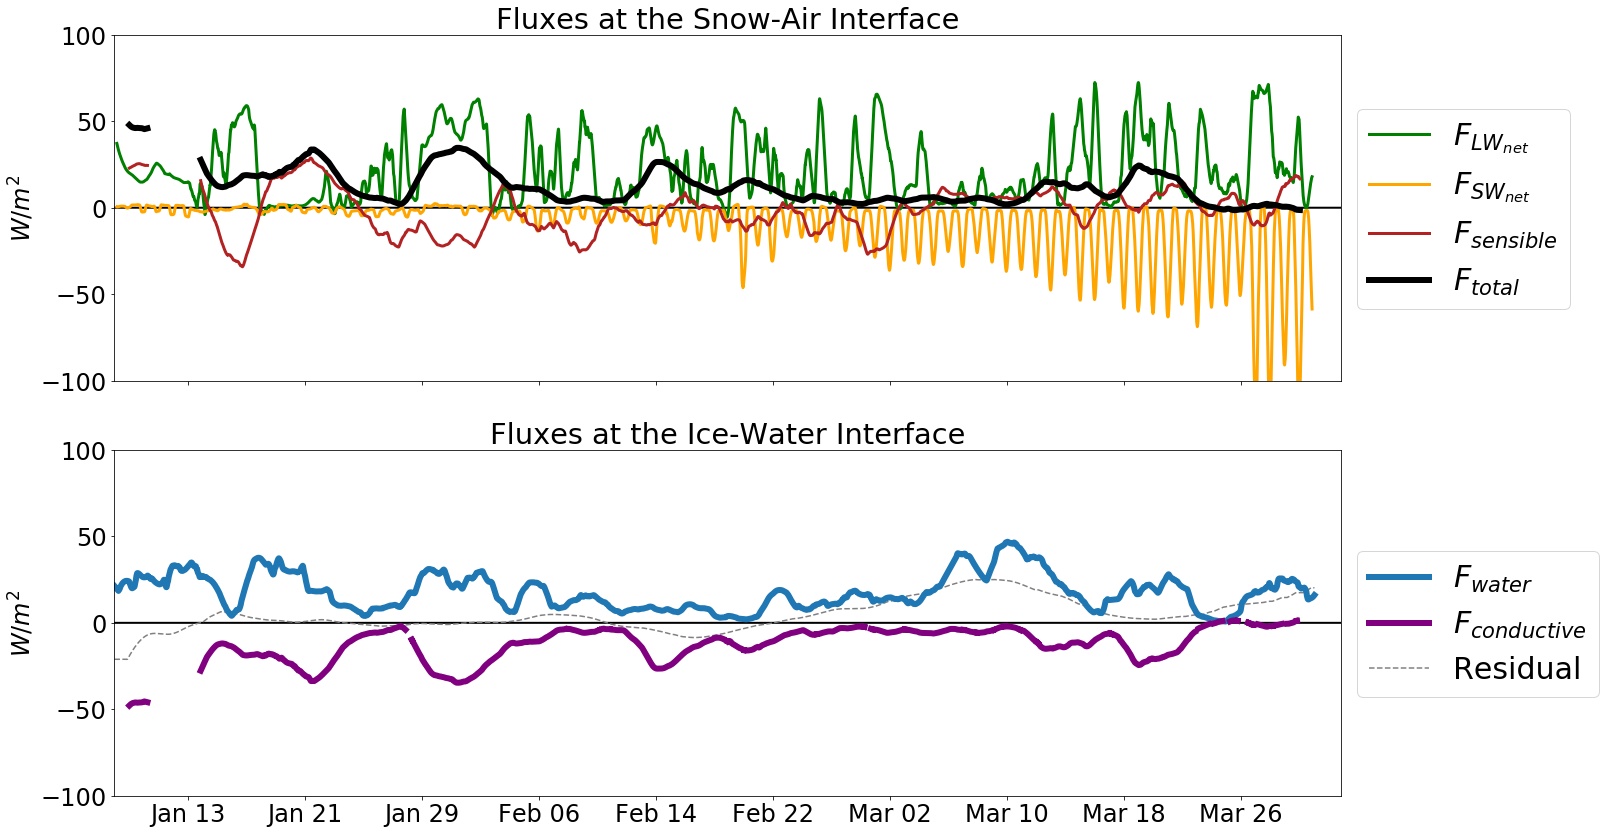

In [256]:
from IkSi_Analysis_Toolbox import calculate_Fw, plot_flux_balances
#calculate ocean-ice heat flux following McPhee '92
Fw_92 = calculate_Fw(deltaT, ustar, rbr_rsmpl, lon, lat)
#Update mass balance data to reflect ice and snow thickness treating flooded snow as ice
mbs_mean = pd.read_csv('../../Data/Sea Ice Station/MassBalance/mbs_mean_withflooding.csv',index_col=0,parse_dates=True,usecols=[0,1,2])
#calculate and plot flux balances at both boundaries
plot_flux_balances(mbs_mean, maximet, cnr_rsmpl, rbr_rsmpl, Fw_92)

*Figure 10: Flux balances at the top and bottom interfaces of the snow/ice layer. The conductive flux away from the bottom interface balances the total flux away from the top interface, and differences between the water-ice heat flux and the conductive flux should lead to ice growth or melt. A 10-day rolling mean of the residual between the water-ice heat flux and the conductive flux suggests the onset of under-ice melting in mid-February.*

## Figure 11: Relationship Between Salinity & Departure From Freezing Point

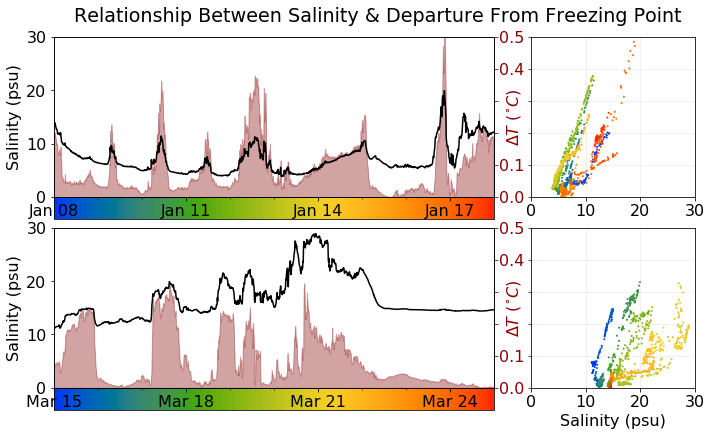

In [262]:
start_sub1,end_sub1 = pd.datetime(2019,1,8),pd.datetime(2019,1,18)
start_sub2,end_sub2 = pd.datetime(2019,3,15),pd.datetime(2019,3,25)
from IkSi_Analysis_Toolbox import plot_sal_v_deltaT
plot_sal_v_deltaT(rbr, start_sub1, end_sub1, start_sub2, end_sub2)

*Figure 11: Sudden increases in salinity correspond to departures of water temperature from the freezing point, implying an oceanic origin for residual heat in the water under the ice. The slope of the excursions in ΔT-Salinity space is very consistent, suggesting a characteristic relationship between salinity excursions & heat content.*

## Figure 12: Temperature and Salinity at OBT - Spring and Fall

In [344]:
#import data
sbeOBT = pd.read_pickle('../../Data/Ocean Bottom Tripod/Pickles/sbe_OBT_2019.p')
sbeOBT18 = pd.read_pickle('../../Data/Ocean Bottom Tripod/Pickles/sbe_OBT_2018.p')

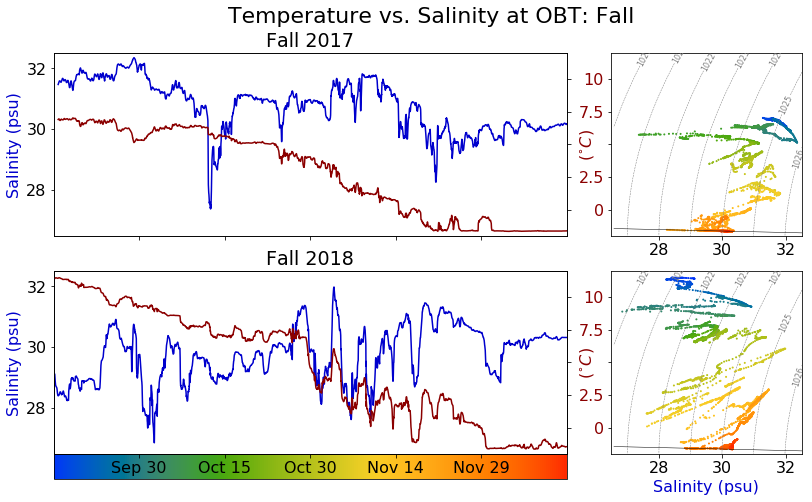

In [345]:
from IkSi_Analysis_Toolbox import plot_OBT_sections
plot_OBT_sections(sbeOBT18, sbeOBT, 
                  start1 = pd.datetime(2017,9,15,0,0,0), end1 = pd.datetime(2017,12,15,0,0,0),
                  start2 = pd.datetime(2018,9,15,0,0,0), end2 = pd.datetime(2018,12,15,0,0,0),
                  sal_lims = [26.5,32.5], 
                  temp_lims = [-2, 12], temp_ticks = [0,2.5,5,7.5,10], temp_tick_labels = ['0','2.5','','7.5','10'],
                  nticks = 5, 
                  title1 = 'Fall 2017',
                  title2 = 'Fall 2018',
                  supTitle = 'Temperature vs. Salinity at OBT: Fall')

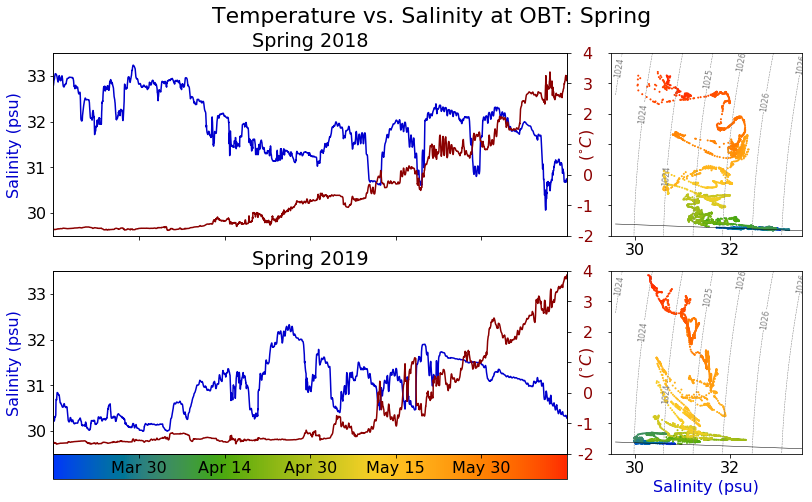

In [346]:
from IkSi_Analysis_Toolbox import plot_OBT_sections
plot_OBT_sections(sbeOBT18, sbeOBT, 
                  start1 = pd.datetime(2018,3,15,0,0,0), end1 = pd.datetime(2018,6,15,0,0,0),
                  start2 = pd.datetime(2019,3,15,0,0,0), end2 = pd.datetime(2019,6,15,0,0,0),
                  sal_lims = [29.5,33.5], 
                  temp_lims = [-2, 4], temp_ticks = [-2,-1,0,1,2,3,4], temp_tick_labels = ['-2  ','-1  ','0  ','','2  ','3  ','4  '],
                  nticks = 5, 
                  title1 = 'Spring 2018',
                  title2 = 'Spring 2019',
                  supTitle = 'Temperature vs. Salinity at OBT: Spring')

*Figure 12: At the mouth of Kotzebue Sound, temperature and salinity are positively correlated in the Fall (a), but negatively correlated in the Spring (b) for both years of measurements. *

## Figure 13: T-S Diagram of fall vs. spring at OBT

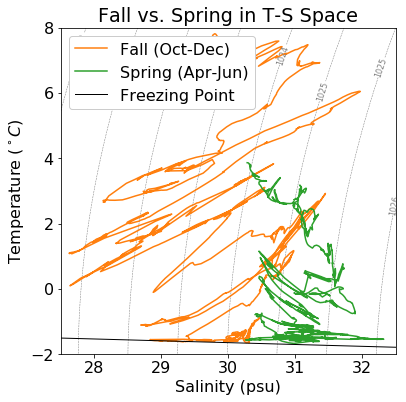

In [357]:
from IkSi_Analysis_Toolbox import plot_OBT_fallVspring_TS
plot_OBT_fallVspring_TS(sbeOBT, 
                        fall_start_18 = pd.datetime(2018,10,15,0,0,0), 
                        fall_end_18 = pd.datetime(2018,12,15,0,0,0), 
                        spring_start_19 = pd.datetime(2019,4,15,0,0,0), 
                        spring_end_19 = pd.datetime(2019,6,15,0,0,0))

*Figure 13: Temperature-Salinity diagram from the 2018/19 year, showing the perpendicularity between salinity-reduction events in fall and spring. The climatological salinity ranges measured in the Bering Strait suggest that pulses of significantly fresher water reflect the influence of Kotzebue Sound river outflow. We posit that the river acts as a heat sink to the sound in the fall/winter, and a heat source in the spring/summer.*

# Appendix 1: Satellite Importing and Subsetting

1.1 - These codes pull data from externally hosted OpenDAP servers, so they can take a long time to execute and they will only work insofar as those servers are still hosted in the same manner. I've left the cell as raw text rather than code to avoid accidentally executing it, but they show how the data got to where it is in the main analysis.

1.2 - creating a land mask for the sea ice data so that we can do meaningful computation on it (right now, both land and zero-ice-cover are NaNs, but we need zero-ice-cover to be 0 and land to be NaN)

In [53]:
from Satellite_SeaIce_Toolbox import subset_ssmi
#open the same data used above
si = xr.open_mfdataset(['../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2018.nc',
                        '../../Data/Satellite/Sea Ice/ASI_SSMI/si_2019.nc'])

#chop off the top part, which made the edge of the map look pretty but isn't within the bounds of the map
lon_min_bering, lon_max_bering = 175, -150
lat_min_bering, lat_max_bering = 58, 75-4.5
xmin_ssmi, xmax_ssmi = 0, 200
ymin_ssmi, ymax_ssmi = 0, 700

si_sub = subset_ssmi(si, lat_min_bering, lat_max_bering, lon_min_bering, lon_max_bering,
                     xmin_ssmi, xmax_ssmi, ymin_ssmi, ymax_ssmi)

#we need to account for the possibility of NaN meaning both zero ice and land by creating a landmask from the day when there is a minimum number of NaNs
#find the time when there is a minimum number of NaN values
nanCounts = np.isnan(si_sub.sea_ice_area_fraction).sum(dim={'x','y'})
maskTime = si_sub.where(nanCounts==nanCounts.min(),drop=True).squeeze().time.values
#create land mask using data from this time
mask_ocean = 2 * np.ones((si_sub.dims['y'], si_sub.dims['x'])) * np.isfinite(si_sub.land.sel(time=maskTime))  
mask_land = 1 * np.ones((si_sub.dims['y'], si_sub.dims['x'])) * np.isnan(si_sub.land.sel(time=maskTime))  
mask_array = mask_ocean + mask_land
#add mask to dataArray
si_sub.coords['mask'] = (('y','x'),mask_array)
si_sub.coords['mask'].attrs['Description'] = '2 for ocean, 1 for land'
#replace all nans with zeros in sea_ice_area_fraction, then re-nan everywhere that isn't ocean
si_sub['sea_ice_area_fraction'] = si_sub.sea_ice_area_fraction.fillna(0).where(si_sub.mask==2)

#save new netcdf file
si_sub.to_netcdf('../../Data/Satellite/Sea Ice/ASI_SSMI/si_2000_2019_masked.nc')

C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)
C:\ProgramData\Anaconda3\lib\site-packages\dask\core.py:137: RuntimeWarning: invalid value encountered in greater
  return func(*args2)


1.3 - Importing Nasa OISST Reynolds Composite Sea Ice Product

In [63]:
yearmonthday

'20000101'

In [72]:
#pathh = 'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/200005/oisst-avhrr-v02r01.20000501.nc'
reysst = xr.open_dataset('https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/NCEI/AVHRR_OI/v2/2000/001/20000101120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.0.nc')  

RuntimeError: NetCDF: cannot delete file

In [65]:
#define spatial limits
lat_min, lat_max = 65.479474, 68.708048
lon_min, lon_max = -169.259880, -160.007140

#define timeframe
start_date = pd.datetime(2000,1,1)
end_date = pd.datetime(2000,1,31)
ddts = pd.date_range(start=start_date,end=end_date) #"daily-date-times"

data_days = []
#----------------------------------------------------------------------------------------#
for day in ddts:
    yearmonth = day.strftime('%Y%m')
    yearmonthday = day.strftime('%Y%m%d')
    #pathh = f'http://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/AVHRR/{yearmonth}/avhrr-only-v2.{yearmonthday}.nc'
    pathh = f'https://www.ncei.noaa.gov/thredds/dodsC/OisstBase/NetCDF/V2.1/AVHRR/{yearmonth}/oisst-avhrr-v02r01.{yearmonthday}.nc'    
    #open that day's data
    reysst = xr.open_dataset(pathh)
    
    #slice data and plot into map
    reysst.sst.sel(lat=slice(lat_min,lat_max), 
                   lon=slice((lon_min+360)%360, (lon_max+360)%360))
    
    data_days.append(reysst)
    
sst = xr.auto_combine(data_days)
sst

RuntimeError: NetCDF: cannot delete file